## Probelem Statement :

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal:**

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 1.Import libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## 2.Data Reading and Understanding

In [4]:
# Read the data from csv file

boomBikes = pd.read_csv('day.csv')

In [5]:
# Check the head of the dataset
 
boomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Check the descriptive information
boomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
boomBikes.holiday.value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

**Considering count , holidays will always less than working days**

**0 - Not Holiday**

**1 - Holiday**

In [8]:
# check the shape of dataframe

boomBikes.shape

(730, 16)

In [9]:
# describing the columns of dataframe

boomBikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Observations:**

Dataset has 730 rows and 16 columns.

Except one column(dteday), all other are either float or integer type.

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

## 3.DATA  CHECK

### 3.1 Null Value check

In [10]:
# checking for the null values in column data

boomBikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# row-wise null count percentage
round((boomBikes.isnull().sum(axis=1)/len(boomBikes))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

**null values check Finding**
There are no missing / Null values either in columns or rows

### 3.2 Duplicate Check

In [12]:
# Copying the dataframe into new

df_copy = boomBikes.copy()

In [13]:
# checking the shape of new dataframe

df_copy.shape

(730, 16)

In [14]:
# dropping the duplicates from new data frame

df_copy.drop_duplicates(inplace=True)

In [15]:
# re-verifying the shape of new dataframe

df_copy.shape

(730, 16)

**Duplicate check findings:**
The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

### 3.3 Renaming variable

In [16]:
# renaming few columns for better readibility

boomBikes.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

### 3.4 Removing redundant or unwanted columns

In [17]:
# columns in dataframe
boomBikes.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

**instant** : Its only an index value

**dteday** : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

**casual & registered** : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

We will save the new dataframe, so that the original dataset is preserved for any future analysis/validation

In [18]:
# Copying the dataframe into new
boomBikes_filtered =boomBikes.copy()

In [19]:
#remove unwanted /redundant columns
boomBikes_filtered.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [20]:
#check shape of old data set
boomBikes.shape

(730, 16)

In [21]:
# chcek shape after removing columns
boomBikes_filtered.shape

(730, 12)

## 4. Encoding columns


Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

***Based on above defination encoding the columns below***

In [22]:
## Encoding/mapping the season column
boomBikes_filtered.season = boomBikes_filtered.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [23]:
# Encoding/mapping the month column

boomBikes_filtered.month = boomBikes_filtered.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [24]:
# Encoding/mapping the weekday column

boomBikes_filtered.weekday = boomBikes_filtered.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [25]:
# Encoding/mapping the weathersit column

boomBikes_filtered.weathersit = boomBikes_filtered.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [26]:
# check the head of the dataset

boomBikes_filtered.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
# check the column info of the dataset

boomBikes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## 5. EDA And Visualising the Data

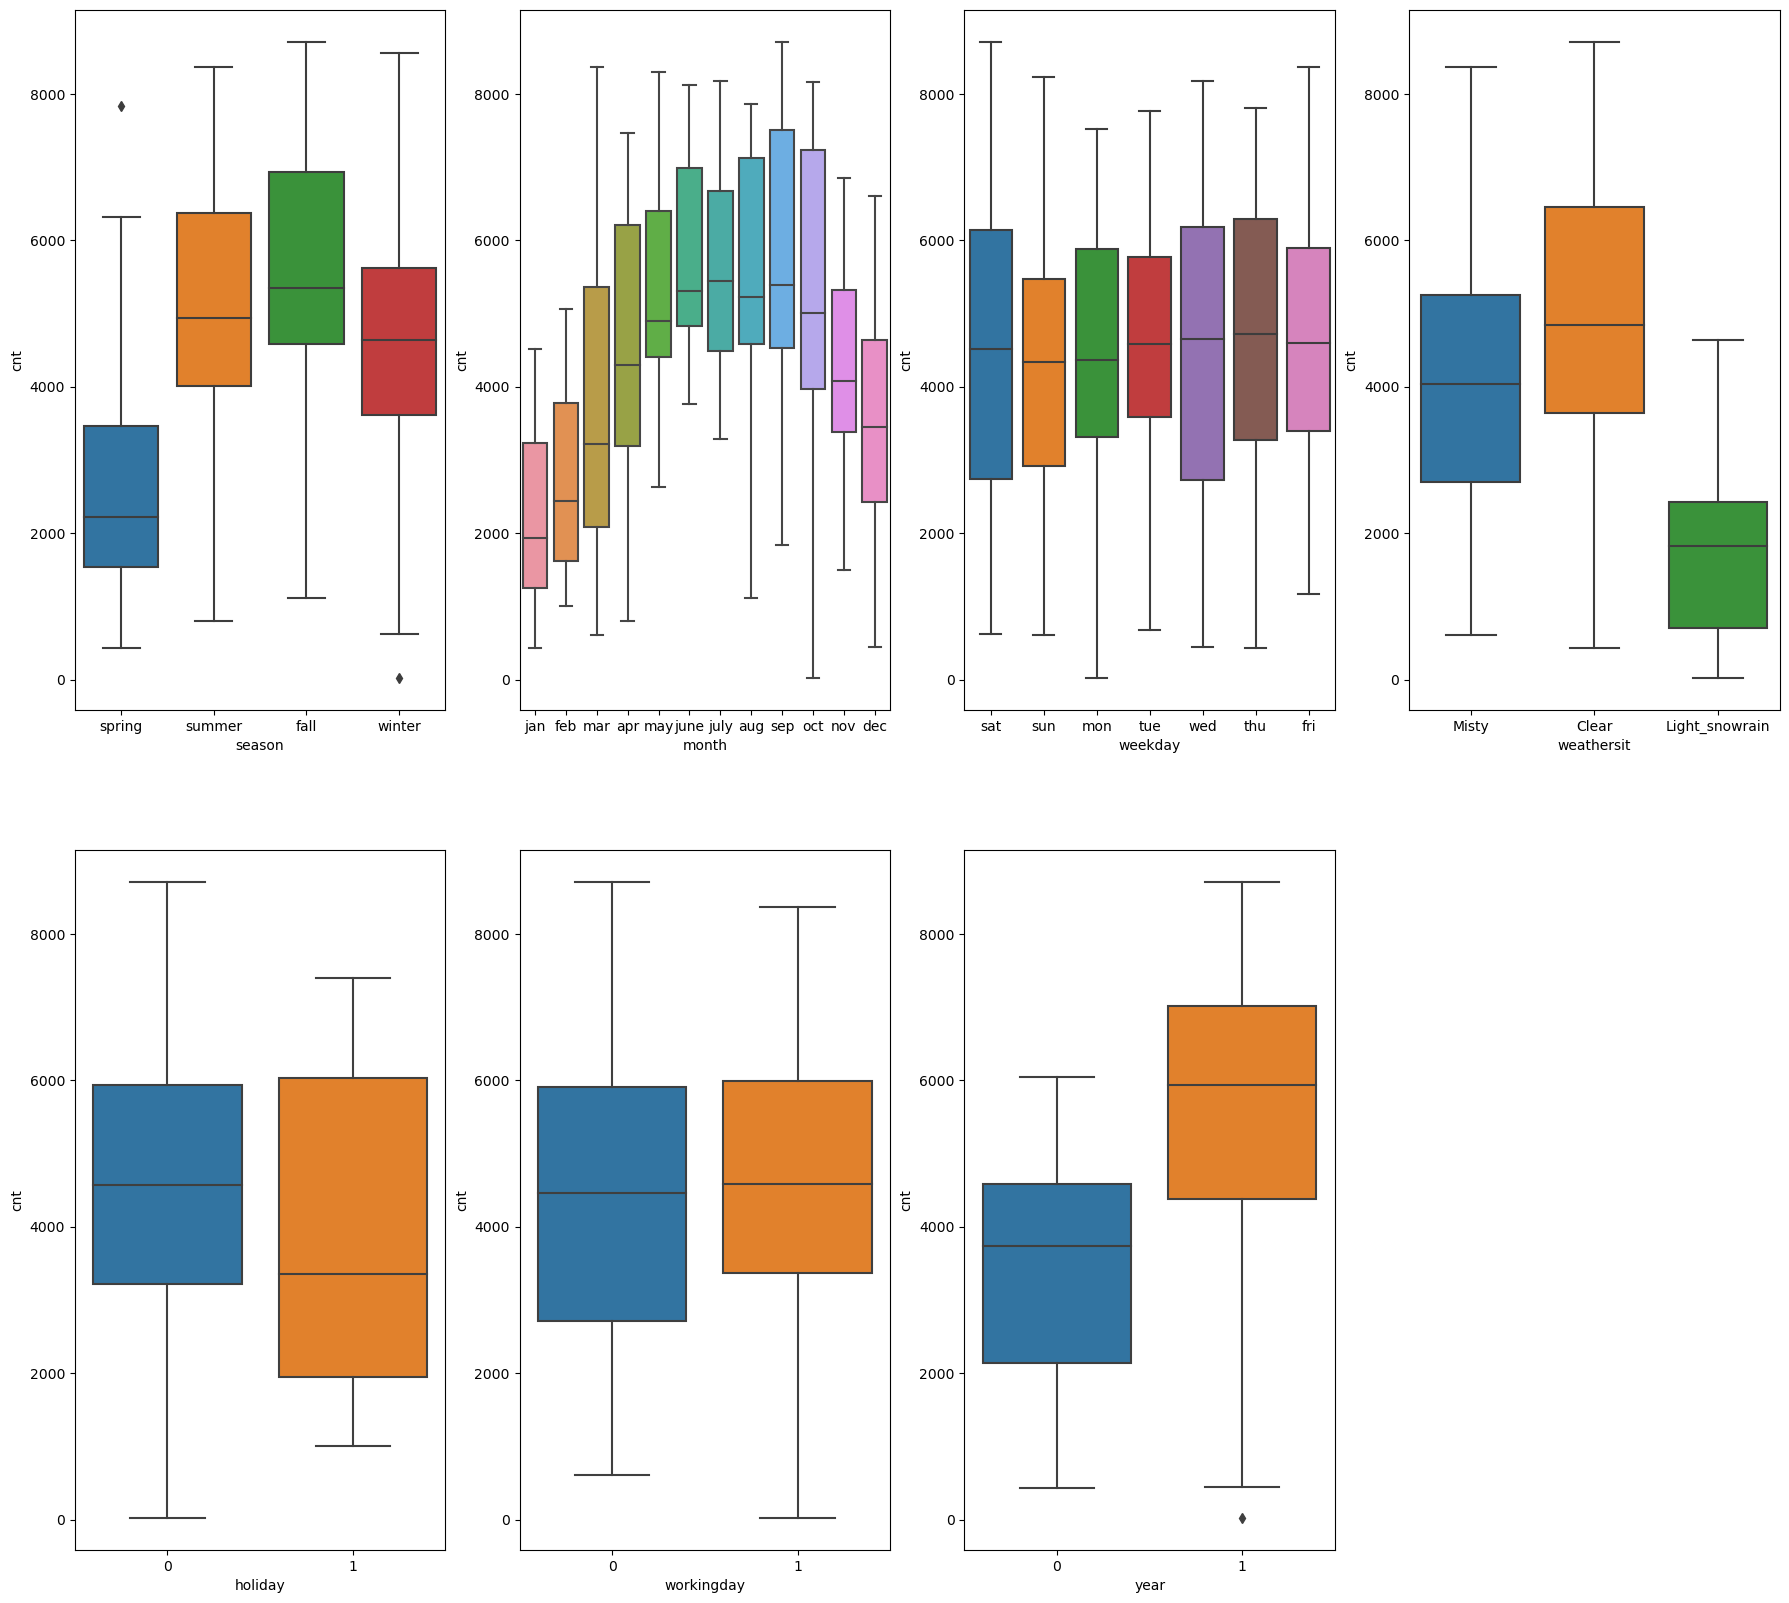

In [28]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable cnt

plt.figure(figsize=(22, 20))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = boomBikes_filtered)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = boomBikes_filtered)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = boomBikes_filtered)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boomBikes_filtered)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = boomBikes_filtered)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = boomBikes_filtered)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = boomBikes_filtered)
plt.show()

In [29]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize=(12, 6))
    
    # Plotting the first subplot
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=boomBikes_filtered)
    plt.title(f'Barplot of {column}')
    
    # Plotting the second subplot with hue='year'
    plt.subplot(1, 2, 2)
    #sns.barplot(x=column, y='cnt', hue='year', data=boomBikes_filtered, palette='Set1')
    #plt.title(f'Barplot of {column} with Year')    
    #plt.legend(labels=['2018', '2019'])
    # Create a custom color palette
    color_palette = {0: 'red', 1: 'blue'}
    # Plot using the custom palette
    sns.barplot(x=column, y='cnt', hue='year', data=boomBikes_filtered, palette=color_palette)
    plt.title(f'Barplot of {column} with Year')
    
    # Create a custom legend
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in color_palette.values()]
    plt.legend(handles, ['2018', '2019'])
    
    plt.tight_layout()  # Ensures plots are properly spaced
    plt.show()

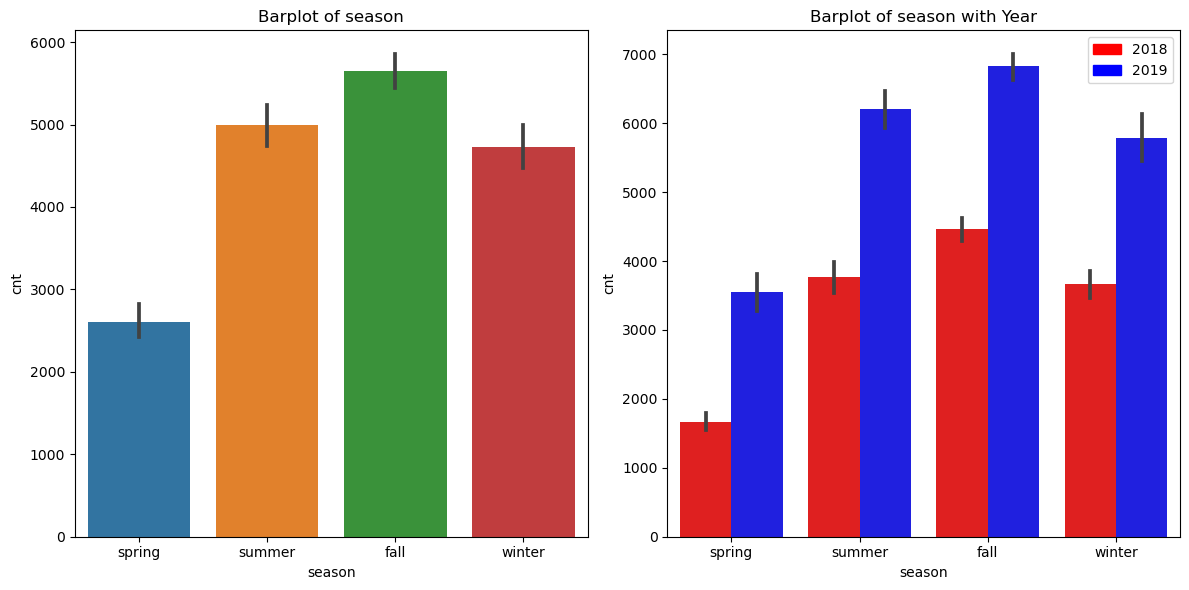

In [30]:
# plotting visualization for season column

plot_cat_columns('season')


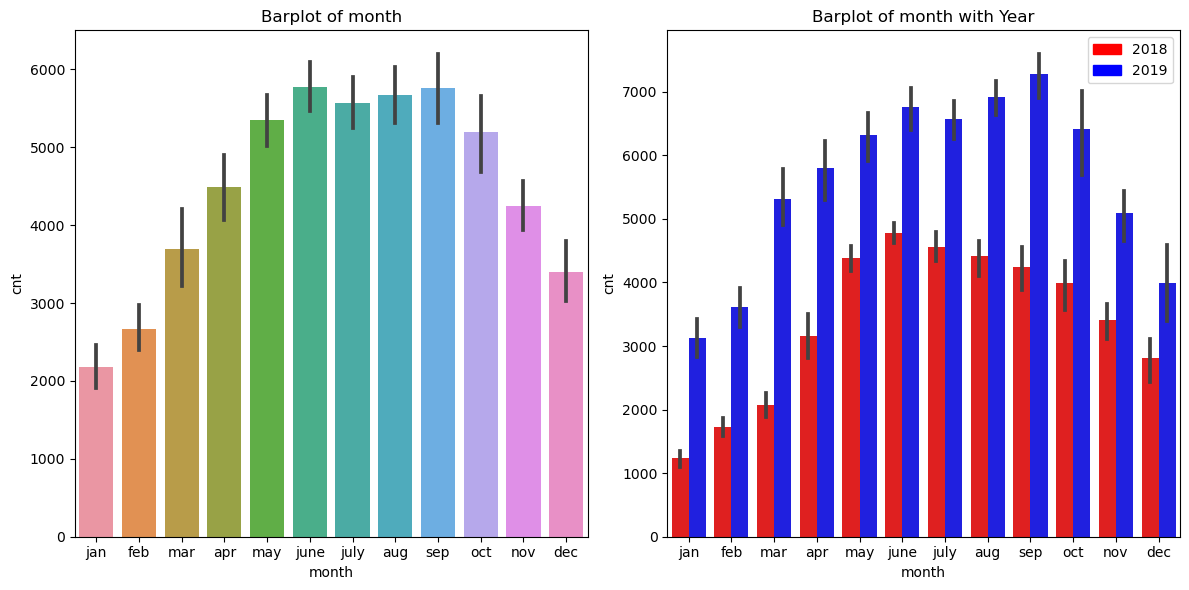

In [31]:
# plotting visualization for month column

plot_cat_columns('month')

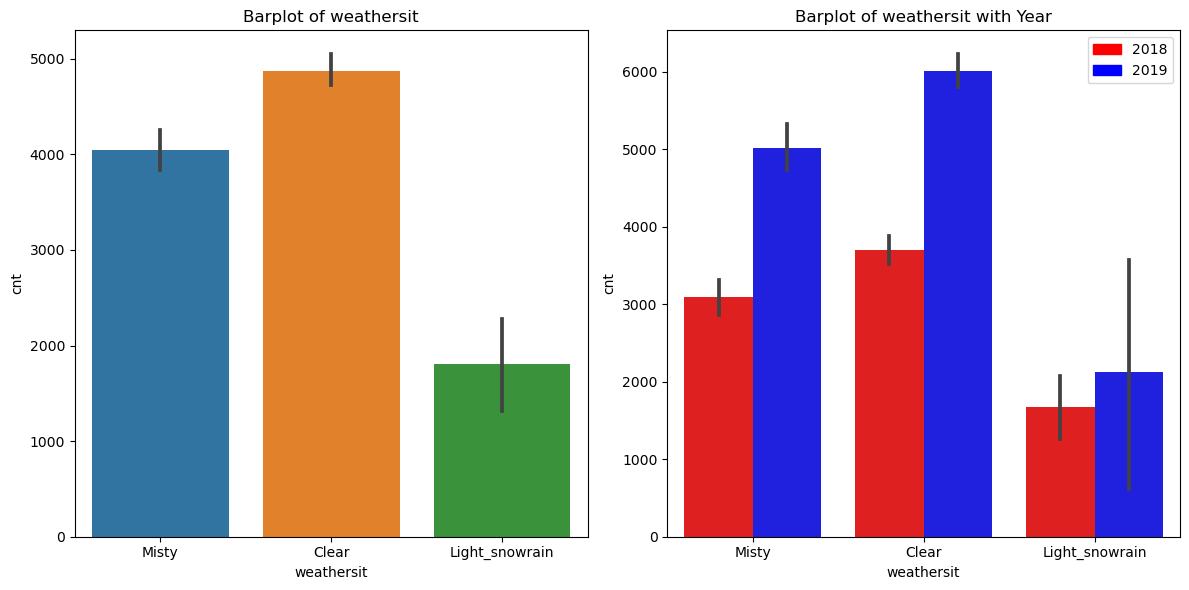

In [32]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

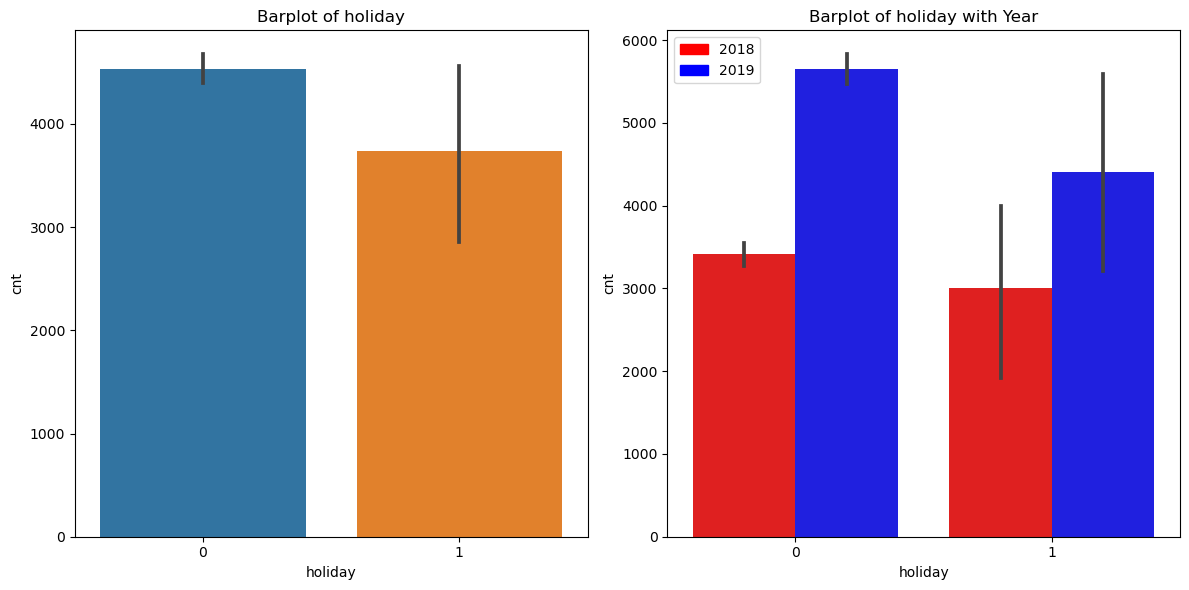

In [33]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

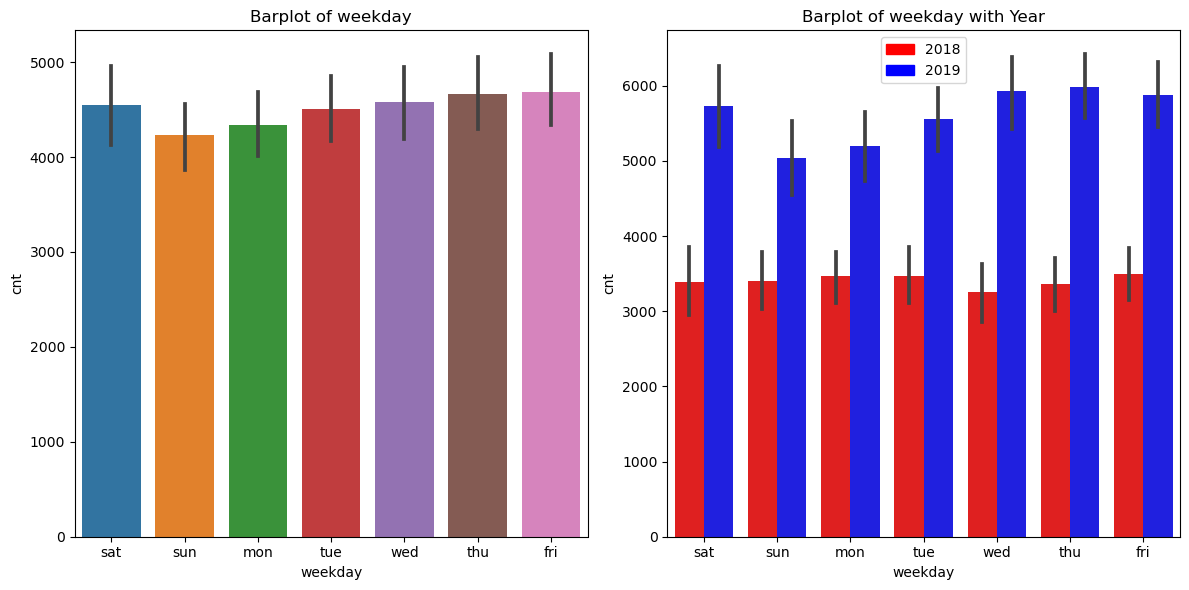

In [34]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

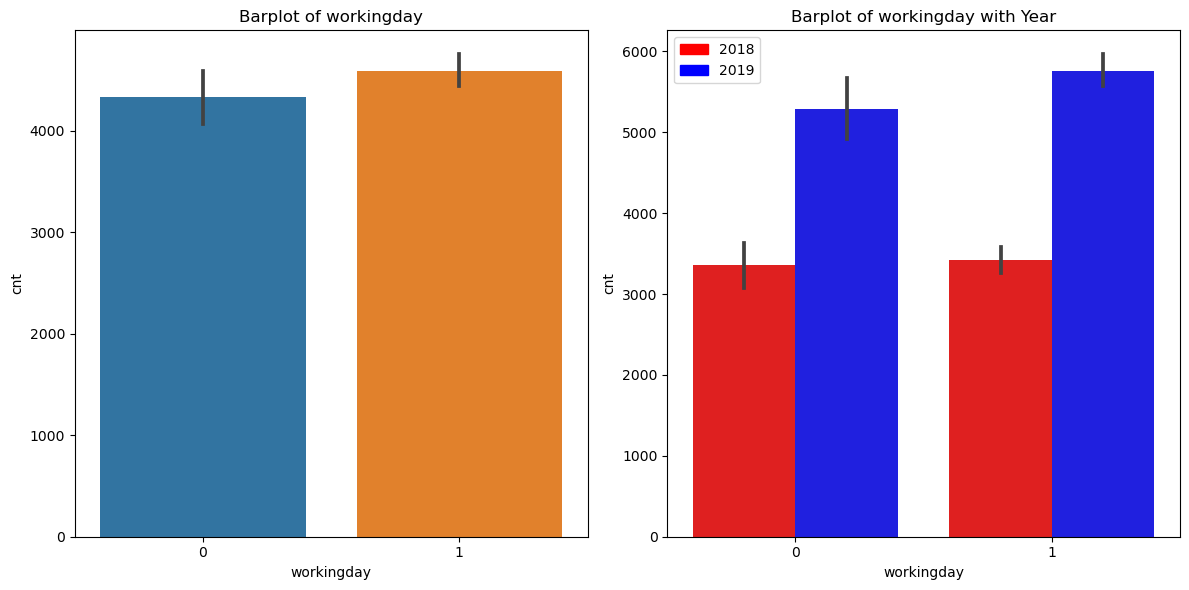

In [35]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

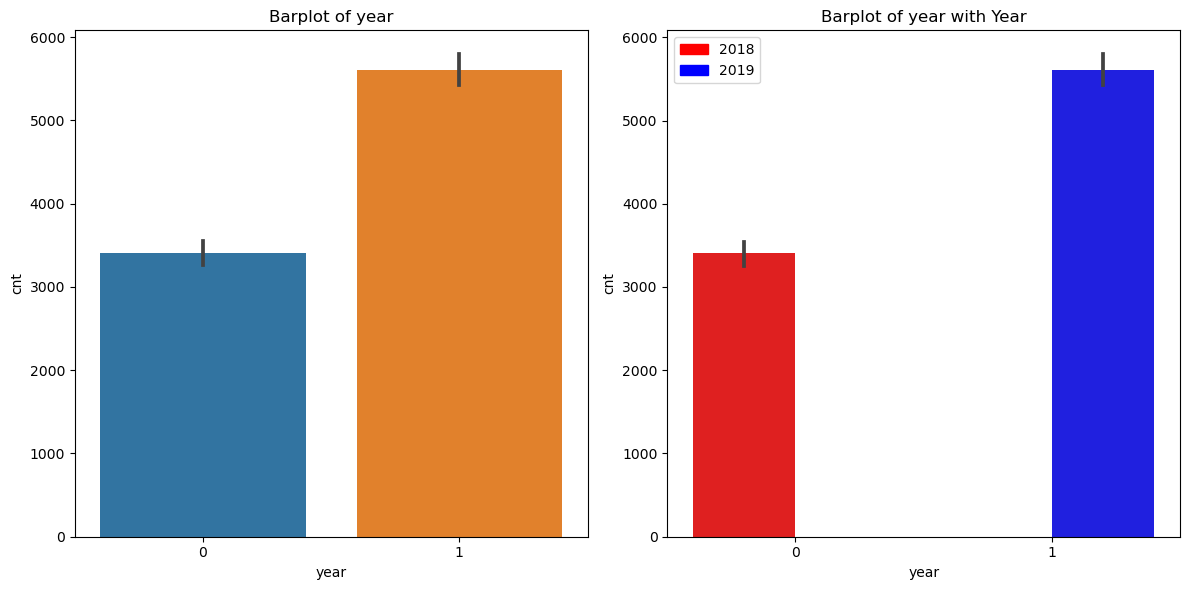

In [36]:
# plotting visualization for year column

plot_cat_columns('year')

**Observation**

**season**: Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019. This indicates, season can be a good predictor for the dependent variable.

**month**: Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

**weathersit**: Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.'. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

**holiday**: Considering 0 as not holiday , booking were made on non holiday days are more which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

**weekday**: wed,Thu, Fir, Sat have more number of bookings as compared to the start of the week.weekday variable shows very close trend having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor the count increased from 2018 to 2019. I will let the model decide if this needs to be added or not.

**workingday**: More bookings done on working day. This indicates, workingday can be a good predictor for the dependent variable

**year** : 2019 attracted more number of booking from the previous year, which shows good progress in terms of business, this indacates it can be a good predictor for the dependent variable

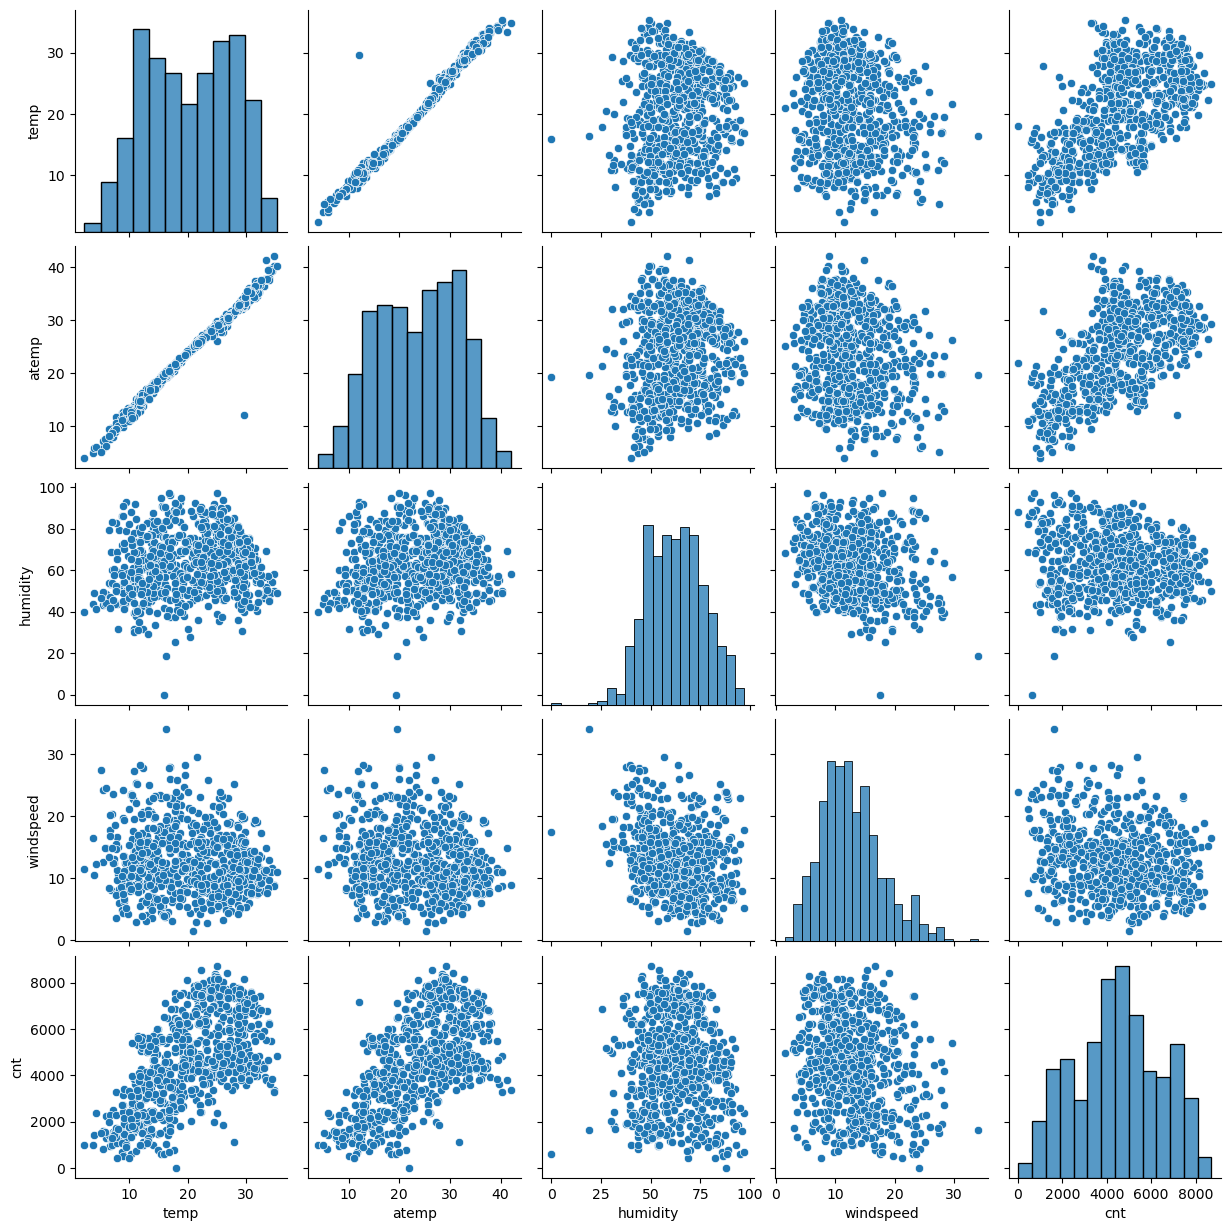

In [37]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=boomBikes_filtered,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

**Observation:**
The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

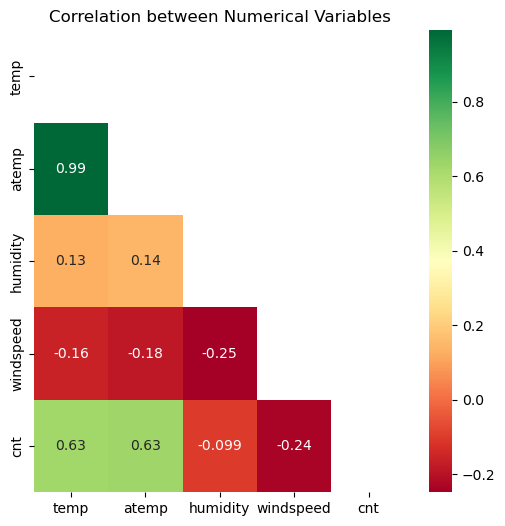

In [38]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(boomBikes_filtered[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(boomBikes_filtered[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

**Observation:**
    There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

In [39]:
boomBikes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [40]:
boomBikes_filtered

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,thu,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,fri,1,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,sat,0,Misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


## 6. Data Preparation

In [41]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_dummy=pd.get_dummies(boomBikes_filtered.month,drop_first=True)
weekdays_dummy=pd.get_dummies(boomBikes_filtered.weekday,drop_first=True)
weathersit_dummy=pd.get_dummies(boomBikes_filtered.weathersit,drop_first=True)
seasons_dummy=pd.get_dummies(boomBikes_filtered.season,drop_first=True)

In [42]:
boomBikes_filtered.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [43]:


# Convert dummy variables to 0s and 1s (if necessary)
months_dummy = months_dummy.astype(int)
weekdays_dummy = weekdays_dummy.astype(int)
weathersit_dummy = weathersit_dummy.astype(int)
seasons_dummy = seasons_dummy.astype(int)
# Merging  the dataframe, with the dummy variable dataset. 
boomBikes_filtered_new = pd.concat([boomBikes_filtered,months_dummy,weekdays_dummy,weathersit_dummy,seasons_dummy],axis=1)

In [44]:
boomBikes_filtered_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [45]:
boomBikes_filtered_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    int32  
 13  dec             730 non-null    int32  
 14  feb             730 non-null    int32  
 15  jan             730 non-null    int32  
 16  july            730 non-null    int32  
 17  june            730 non-null    int

In [46]:
# dropping unnecessary columns as we have already created dummy variable out of it.

boomBikes_filtered_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [47]:
# check the shape of new dataframe

boomBikes_filtered_new.shape

(730, 30)

In [48]:
# check the head of new dataframe

boomBikes_filtered_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [49]:
# check the column info of new dataframe 

boomBikes_filtered_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    int32  
 9   dec             730 non-null    int32  
 10  feb             730 non-null    int32  
 11  jan             730 non-null    int32  
 12  july            730 non-null    int32  
 13  june            730 non-null    int32  
 14  mar             730 non-null    int32  
 15  may             730 non-null    int32  
 16  nov             730 non-null    int32  
 17  oct             730 non-null    int

## 7. Split Data into Train and Test Dataset

In [50]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(boomBikes_filtered_new, train_size = 0.7, random_state = 100)

In [51]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [52]:
# check the shape of testing datatset

df_test.shape

(220, 30)

### 7.1 Rescaling the Features

In [53]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [54]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [55]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [56]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [57]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 7.2 check and Visualizing the correlation coefficients

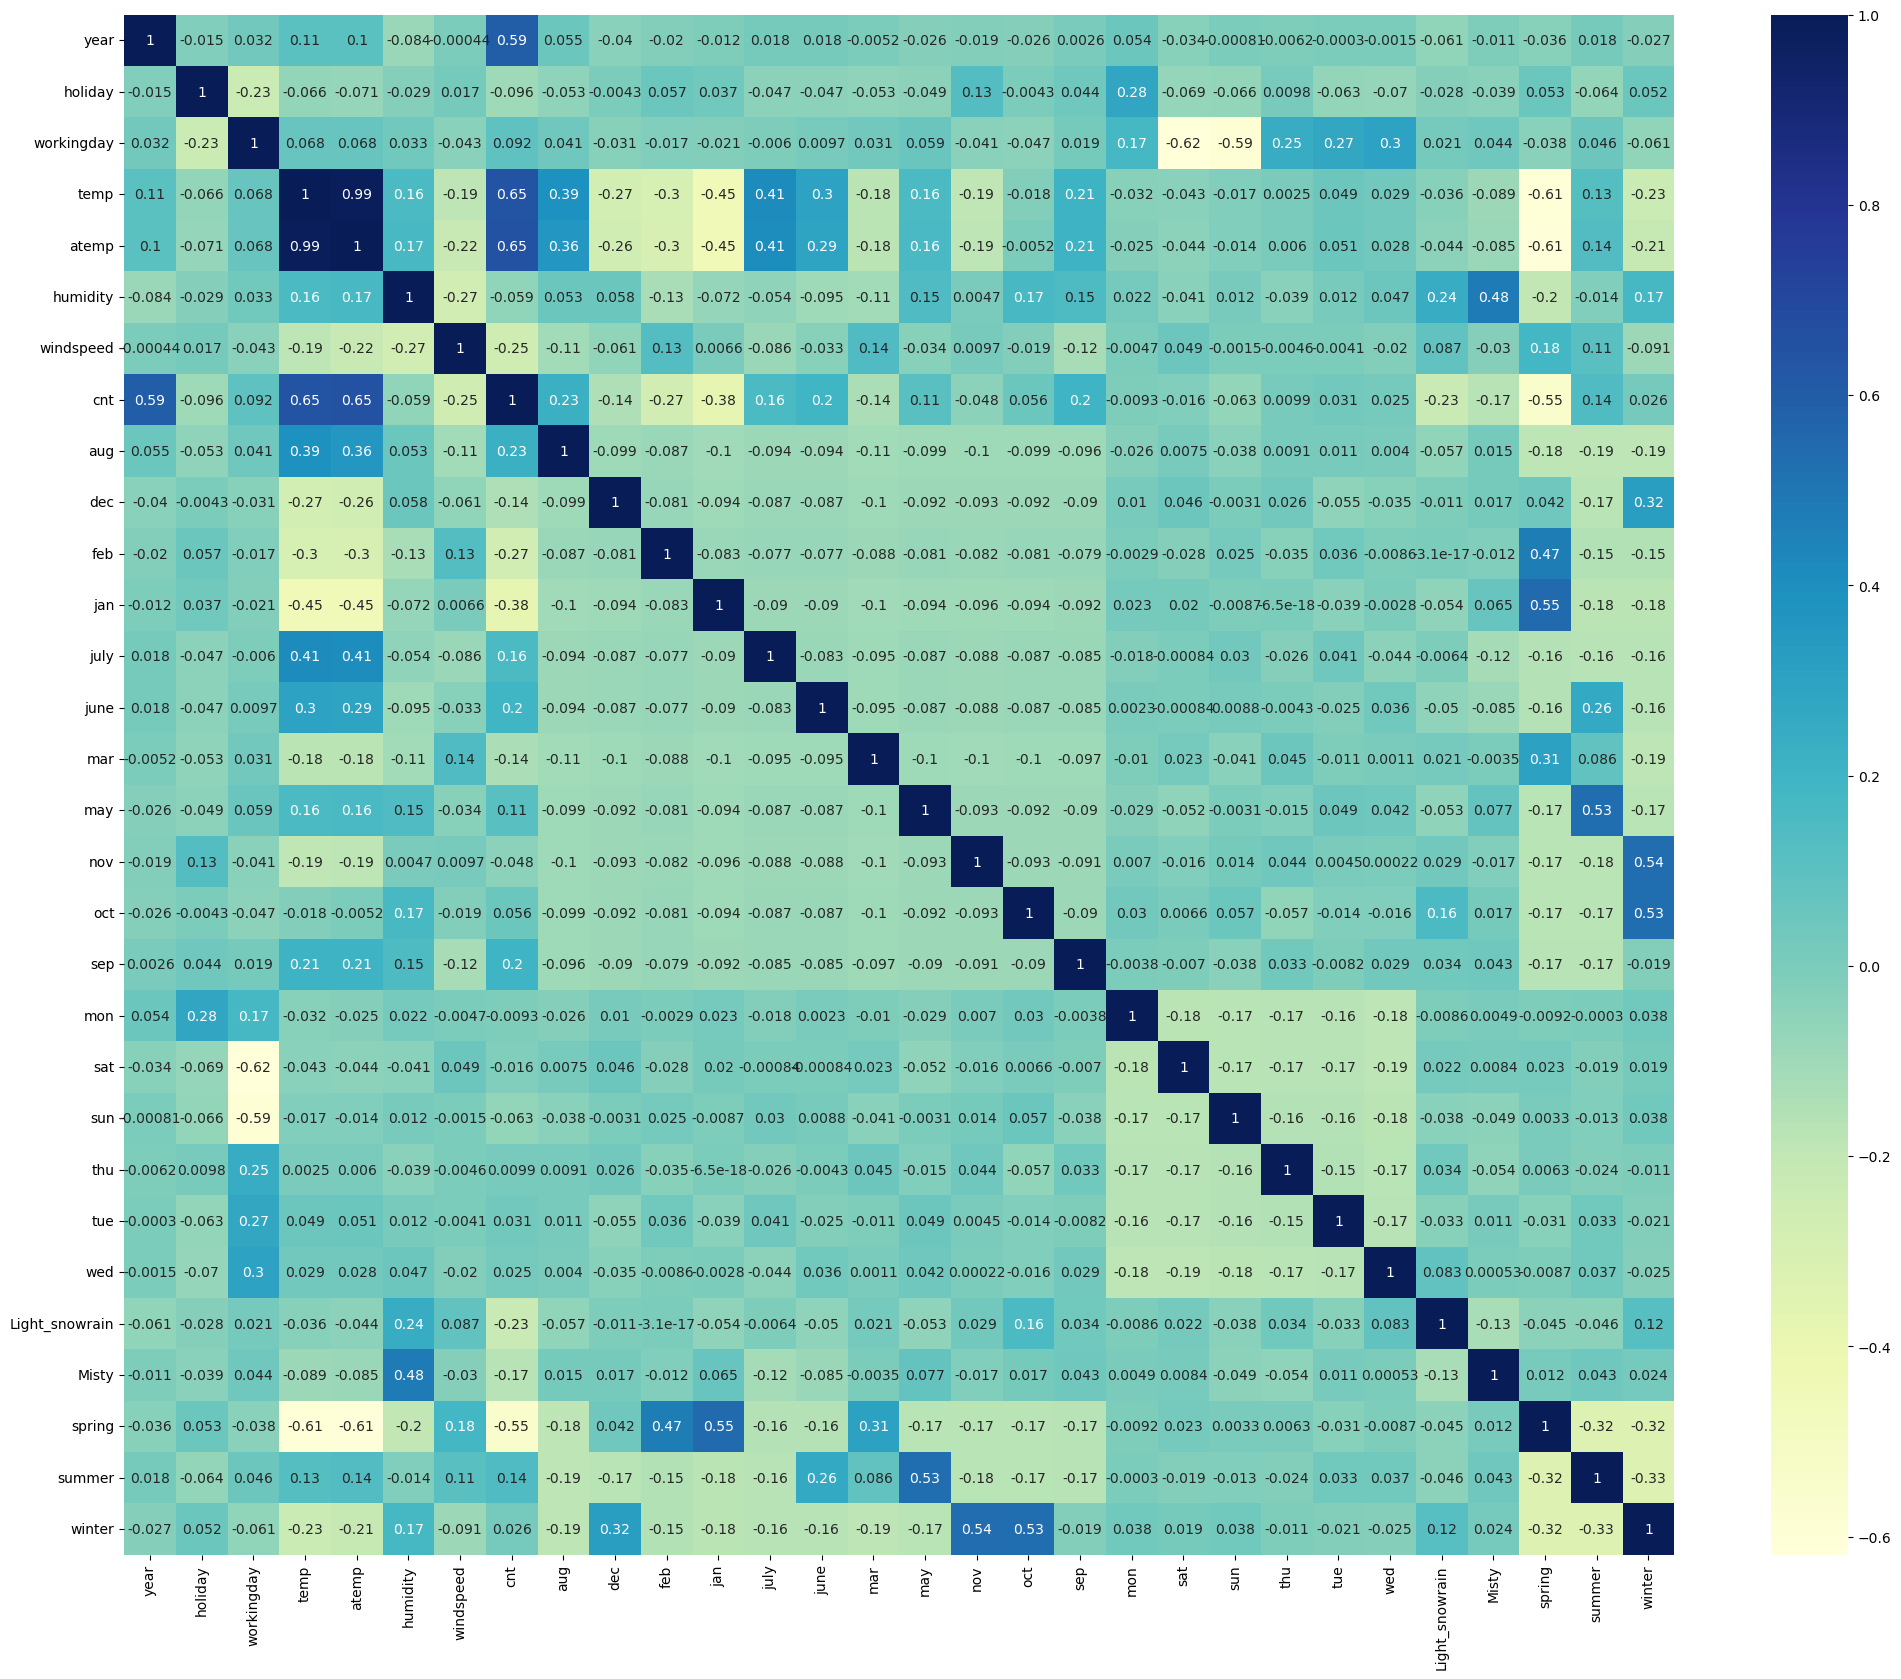

In [58]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

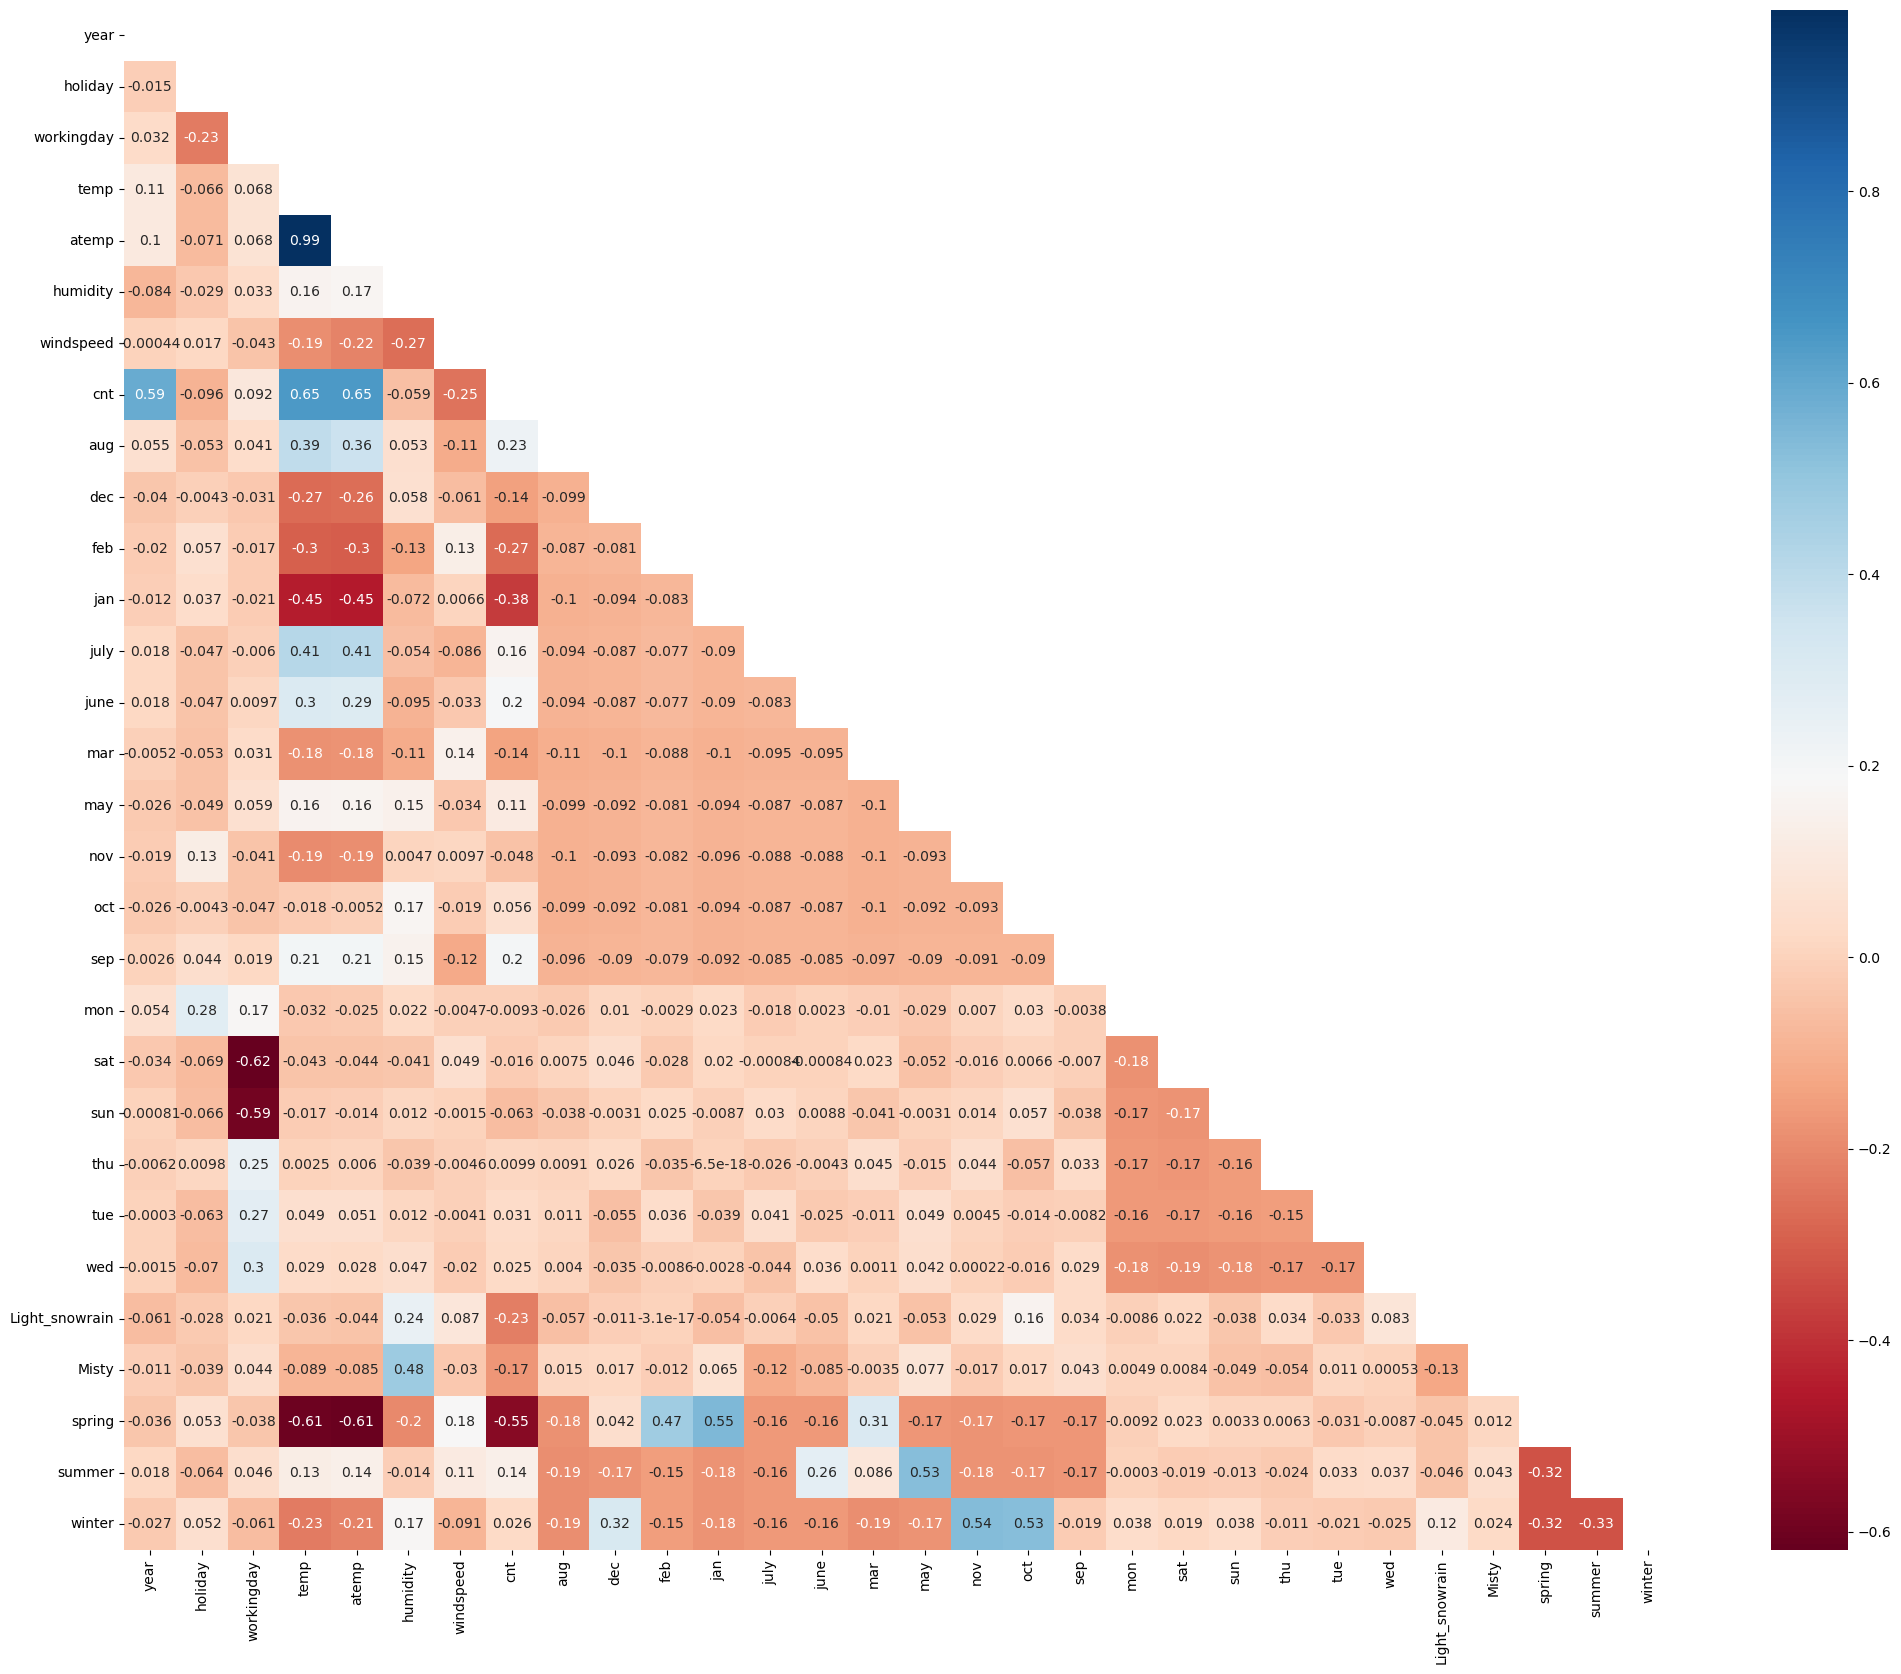

In [59]:
plt.figure(figsize = (25,20))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu", mask=matrix)
plt.show()

**Observation :**    
    
 1. Misty and humidity show correlation.
 2. cnt seems to have correlation with year variable and temp.
 3. Spring season with Jan and Feb month , Summer season with may month and Winter season with oct and nov month show good correlation.    

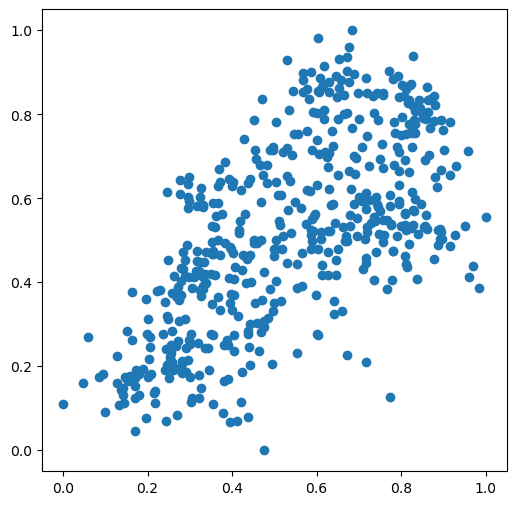

In [60]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()


**Observation :**    
 1. Visualization confirms the positive correlation between temp and cnt.

## 8. BUILDING A LINEAR MODEL

### 8.1 Dividing into X and Y sets for the model building

In [61]:
# Building the Linear Model : Dividing into X and Y sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

### 8.2 RFE

In [62]:
# Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [63]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [64]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 11),
 ('wed', False, 14),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [65]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'summer', 'winter'],
      dtype='object')


In [66]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [67]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [68]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [69]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
8,sat,12.20
9,sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,humidity,1.91
11,Misty,1.57


**Observation:** workingday shows high VIF value

### 8.3 Building linear model -01

In [70]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.11e-191
Time:                        11:26:29   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1995      0.028      7.

### 8.4 Building Linear model -02

 Removing the variable 'sat' based on its High VIF

In [71]:
# As sat shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
4,humidity,29.30
3,temp,16.59
2,workingday,5.11
5,windspeed,4.67
11,spring,4.15
13,winter,3.39
12,summer,2.83
10,Misty,2.31
0,year,2.08
8,sun,1.90


humidity shows high VIF value.

In [72]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.11e-191
Time:                        11:26:47   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2932      0.035      8.

### 8.5 Building Linear model -03

 Removing the variable 'humidity' based on its High VIF

In [73]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,6.97
2,workingday,4.93
4,windspeed,4.61
10,spring,2.50
11,summer,2.35
0,year,2.07
12,winter,2.02
7,sun,1.84
5,july,1.59
9,Misty,1.56


workingday shows high VIF value.

In [74]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.28e-188
Time:                        11:26:58   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.031      7.

### 8.6 Building Linear model -04

remove workingday due to its high VIF and P value

In [76]:
# As workingday shows high VIF and high P values hence we can drop it
X_train_new = X_train_new.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,summer,2.24
9,spring,2.11
0,year,2.07
11,winter,1.81
4,july,1.59
8,Misty,1.56
5,sep,1.34
6,sun,1.18


In [77]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.45e-189
Time:                        11:27:22   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2060      0.029      7.

### 8.7 Building Linear model -05

In [78]:
# We can drop july variable as considering its p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,spring,2.02
9,summer,1.91
10,winter,1.66
7,Misty,1.55
4,sep,1.23
5,sun,1.18
6,Light_snowrain,1.08


In [79]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          3.23e-189
Time:                        11:27:41   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1981      0.029      6.

### 8.8 Building Linear model -06

In [80]:
# Lets droping sun variable as considering analysis during visulization 
X_train_new = X_train_new.drop(['sun'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


In [81]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.47e-186
Time:                        11:27:53   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

**Observation:**
   1. We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
   2. F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant

In [82]:
# Checking the parameters and their coefficient values
lr_6.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
sep               0.090998
Light_snowrain   -0.285031
Misty            -0.078741
spring           -0.055406
summer            0.062076
winter            0.094476
dtype: float64

## 9. Residual Analysis of the train data and validation

In [83]:
X_train_lm_6

,const,year,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


### 9.1 Normality of error terms

In [84]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

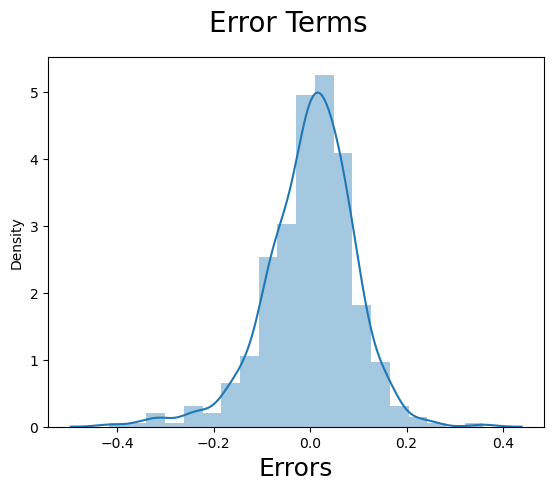

In [85]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

**Observation:** Error terms are following normal distribution

### 9.2 Multi Colinearity

In [86]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


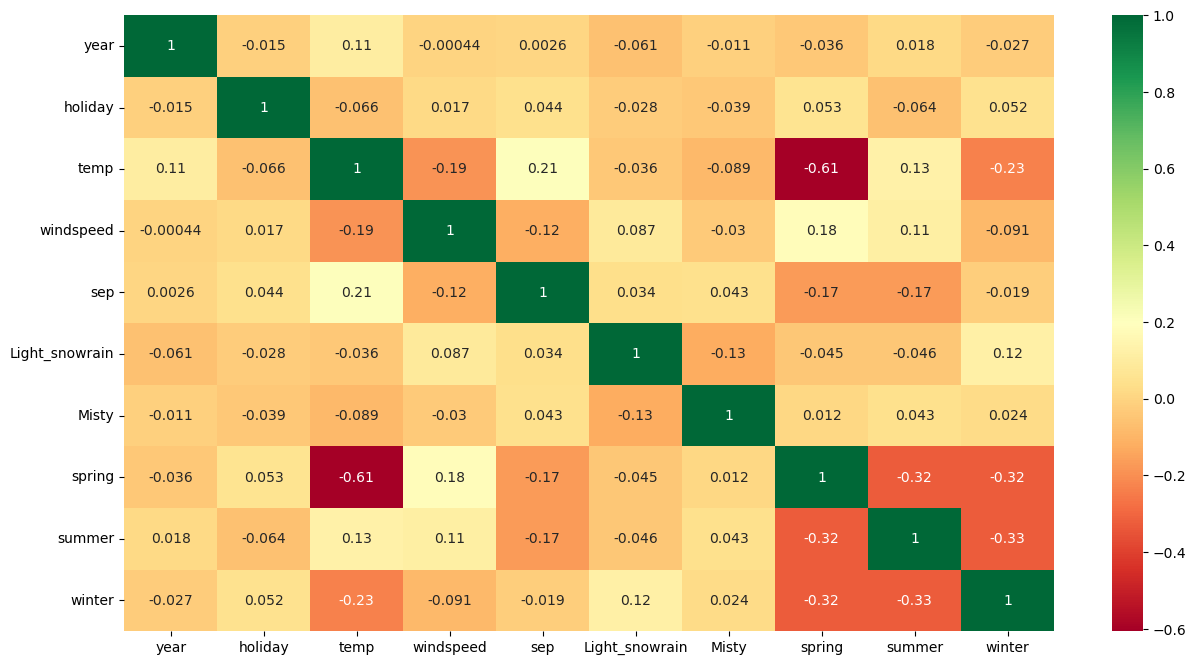

In [87]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

**Observation:** VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

### 9.3 Homoscedasticity

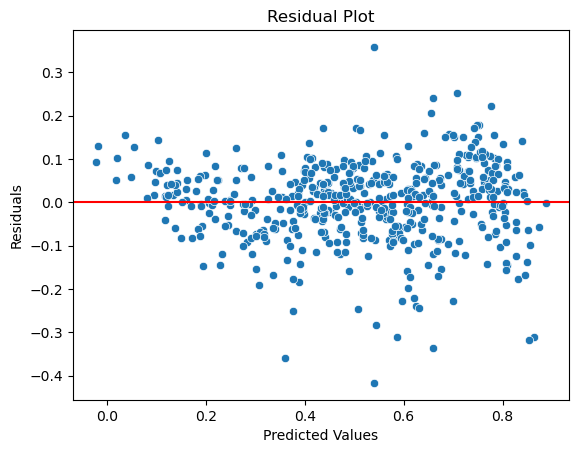

In [88]:
#type of pattern in the residuals (or errors) of a regression model

y_train_pred = lr_6.predict(X_train_lm_6)

# Calculate residuals
residuals = y_train - y_train_pred

# Create scatter plot of residuals vs. predicted values
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**Observation:** No visible pattern observed from above plot for residuals.

### 9.4 Linearity

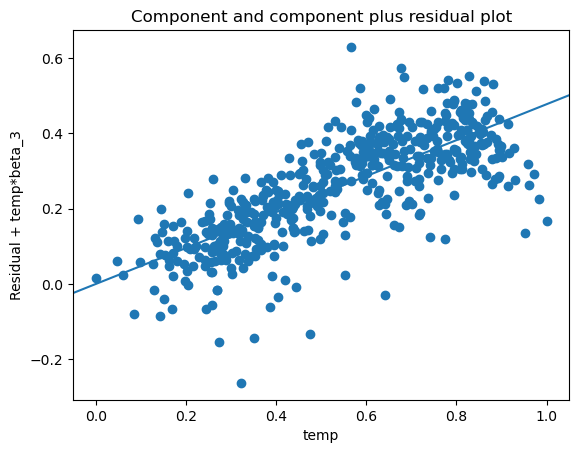

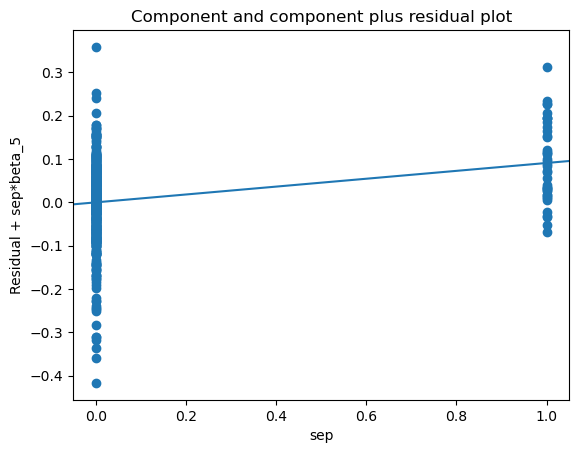

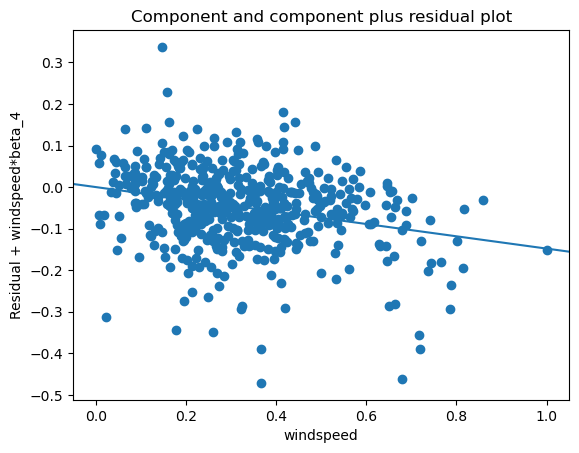

In [90]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

**Observation:** Linearity observed from above visualizations

## 9.5 Independence of residuals
Durbin-Watson value of final model lr_6 is 2.085, which signifies there is no autocorrelation.

## 10. Predections using Final Model

In [91]:
#predictions using the final, i.e. 6th model.

In [92]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [93]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Dividing into X and Y sets

In [94]:
y_test = df_test.pop('cnt')
X_test = df_test

In [96]:
#getting columns of X_train_new and getting same set of columns in test dataset
columns1 = X_train_new.columns

X_test = X_test[columns1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [97]:
# Making predictions using the 6th model.
y_pred = lr_6.predict(X_test_lm_6)

### Calculating R -Square - Test

In [98]:
#get the R-squared (coefficient of determination) score 
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

## 11. Evaluating Model

Text(0, 0.5, 'y_pred')

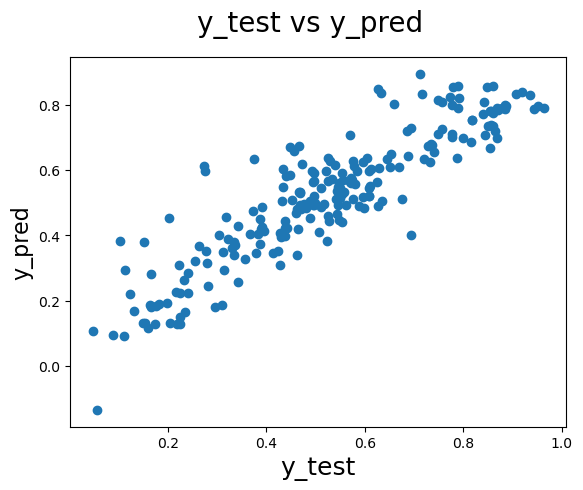

In [99]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [100]:
#get parameters of model
round(lr_6.params,4)

const             0.1909
year              0.2341
holiday          -0.0963
temp              0.4777
windspeed        -0.1481
sep               0.0910
Light_snowrain   -0.2850
Misty            -0.0787
spring           -0.0554
summer            0.0621
winter            0.0945
dtype: float64

**equation of best fitted line is:**
    $ cnt = 0.1909 + 0.2341  \times  year - 0.0963  \times  holiday + 0.4777 \times temp - 0.1481 \times windspeed + 0.0910 \times sep - 0.2850 \times Light_snowrain - 0.0787 \times Misty - 0.0554 \times spring + 0.0621 \times summer + 0.0945 \times winter $

### Calculating Adjusted-R-Square value

In [102]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


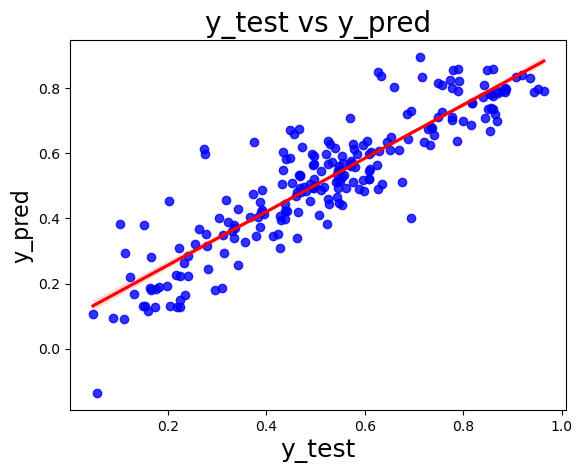

In [103]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## 12. Summary of Test and Train Data set

 1. Train dataset R^2          : 0.833
 2. Test dataset R^2           : 0.8038
 3. Train dataset Adjusted R^2 : 0.829    
 4. Test dataset Adjusted R^2  : 0.7944

#### Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.

𝑐𝑛𝑡=0.1909+0.2341×𝑦𝑒𝑎𝑟−0.0963×ℎ𝑜𝑙𝑖𝑑𝑎𝑦+0.4777×𝑡𝑒𝑚𝑝−0.1481×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑+0.0910×𝑠𝑒𝑝−0.2850×𝐿𝑖𝑔ℎ𝑡𝑠𝑛𝑜𝑤𝑟𝑎𝑖𝑛−0.0787×𝑀𝑖𝑠𝑡𝑦−0.0554×𝑠𝑝𝑟𝑖𝑛𝑔+0.0621×𝑠𝑢𝑚𝑚𝑒𝑟+0.0945×𝑤𝑖𝑛𝑡𝑒𝑟

As per our final Model, the top 3 predictor variables that influences the bike booking are:

**Temperature (temp) -** A coefficient value of ‘0.4777’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.4777 units.
**Light_snowrain -** A coefficient value of ‘−0.2850’ indicated that, a unit increase in Light_snowrain variable decreases the bike hire numbers by 0.2850 units.
**year (yr) -** A coefficient value of ‘0.2341’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2341 units.